# Análisis de frecuencias y contenido de Netflix

### Carga de los datos

Para descargarse la actividad hay que ir a https://www.netflix.com/viewingactivity y darle abajo del todo a la derecha a "Descargar todo".

Se crea un CSV con 2 columnas. La primera con el título que has visto, y la segunda con la fecha.

In [1]:
# Librerias a importar
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import pi

In [2]:
# Carga del archivo
# Debemos introducir el archivo en la carpeta del proyecto, o modificar la ruta de la siguiente línea.
netflix_df = pd.read_csv(r'NetflixViewingHistory.csv', sep=',')

In [3]:
netflix_df.head(5)

,Title,Date
0,El Irlandés,27/12/20
1,Brooklyn Nine-Nine: Temporada 3: Adrian Pimento,20/12/20
2,Brooklyn Nine-Nine: Temporada 3: Casa ratón,14/12/20
3,Brooklyn Nine-Nine: Temporada 3: La 9-8,14/12/20
4,Dos policías rebeldes,11/12/20


In [4]:
netflix_df.describe()

,Title,Date
count,593,593
unique,593,168
top,Brooklyn Nine-Nine: Temporada 6: El tarro de miel,19/11/20
freq,1,19


Como se puede ver hay fechas que no tienen títulos, por lo que habrá que eliminar estas filas

In [5]:
netflix_df = netflix_df.dropna()
#Reasignamos los índices para que no haya problemas al iterar más adelante
netflix_df.reset_index(drop=True, inplace=True)

In [6]:
netflix_df.describe()

,Title,Date
count,593,593
unique,593,168
top,Brooklyn Nine-Nine: Temporada 6: El tarro de miel,19/11/20
freq,1,19


Ahora empezamos a agregar información

In [7]:
# Conocer si es serie o película
netflix_df['Tipo'] = ['Serie' if ('Temporada' in data or 'Miniserie' in data or 'Parte' in data) else 'Película' for data in netflix_df['Title']]

In [8]:
netflix_df.head(20)

,Title,Date,Tipo
0,El Irlandés,27/12/20,Película
1,Brooklyn Nine-Nine: Temporada 3: Adrian Pimento,20/12/20,Serie
2,Brooklyn Nine-Nine: Temporada 3: Casa ratón,14/12/20,Serie
3,Brooklyn Nine-Nine: Temporada 3: La 9-8,14/12/20,Serie
4,Dos policías rebeldes,11/12/20,Película
5,Brooklyn Nine-Nine: Temporada 3: Karen Peralta,10/12/20,Serie
6,Brooklyn Nine-Nine: Temporada 3: El crucero,10/12/20,Serie
7,Brooklyn Nine-Nine: Temporada 3: Nueve días,10/12/20,Serie
8,Brooklyn Nine-Nine: Temporada 3: Situación con...,10/12/20,Serie
9,Brooklyn Nine-Nine: Temporada 3: Yippie Kayak,10/12/20,Serie


In [9]:
#Creamos las nuevas columnas
netflix_df['Título']=np.nan
netflix_df['Temporada']=np.nan
netflix_df['Capítulo']=np.nan

# Separamos los strings en función de si es serie o película
for i,row in netflix_df.iterrows():
    if 'Temporada' in netflix_df.iloc[i,0] or 'Miniserie' in netflix_df.iloc[i,0] or 'Parte' in netflix_df.iloc[i,0]:
        #Check para que alguna serie que tiene ':' en el título salga bien
        if 'Temporada' in netflix_df.iloc[i,0].split(':')[1] or 'Miniserie' in netflix_df.iloc[i,0].split(':')[1] or 'Parte' in netflix_df.iloc[i,0].split(':')[1]:
            netflix_df.iloc[i,4] = netflix_df.iloc[i,0].split(':')[1]
            netflix_df.iloc[i,3] = netflix_df.iloc[i,0].split(':')[0]
        else:
            netflix_df.iloc[i,3] = netflix_df.iloc[i,0].split(':')[0] +': '+ netflix_df.iloc[i,0].split(':')[1]
            netflix_df.iloc[i,4] = netflix_df.iloc[i,0].split(':')[2]
        netflix_df.iloc[i,5] = netflix_df.iloc[i,0].split(':')[-1]
    else:
        netflix_df.iloc[i,3] = netflix_df.iloc[i,0]
    

In [10]:
netflix_df

,Title,Date,Tipo,Título,Temporada,Capítulo
0,El Irlandés,27/12/20,Película,El Irlandés,NaN,NaN
1,Brooklyn Nine-Nine: Temporada 3: Adrian Pimento,20/12/20,Serie,Brooklyn Nine-Nine,Temporada 3,Adrian Pimento
2,Brooklyn Nine-Nine: Temporada 3: Casa ratón,14/12/20,Serie,Brooklyn Nine-Nine,Temporada 3,Casa ratón
3,Brooklyn Nine-Nine: Temporada 3: La 9-8,14/12/20,Serie,Brooklyn Nine-Nine,Temporada 3,La 9-8
4,Dos policías rebeldes,11/12/20,Película,Dos policías rebeldes,NaN,NaN
5,Brooklyn Nine-Nine: Temporada 3: Karen Peralta,10/12/20,Serie,Brooklyn Nine-Nine,Temporada 3,Karen Peralta
6,Brooklyn Nine-Nine: Temporada 3: El crucero,10/12/20,Serie,Brooklyn Nine-Nine,Temporada 3,El crucero
7,Brooklyn Nine-Nine: Temporada 3: Nueve días,10/12/20,Serie,Brooklyn Nine-Nine,Temporada 3,Nueve días
8,Brooklyn Nine-Nine: Temporada 3: Situación con...,10/12/20,Serie,Brooklyn Nine-Nine,Temporada 3,Situación con rehenes
9,Brooklyn Nine-Nine: Temporada 3: Yippie Kayak,10/12/20,Serie,Brooklyn Nine-Nine,Temporada 3,Yippie Kayak


In [11]:
#Creación de df_series y df_pelis
series_df = pd.DataFrame(columns = ['Title', 'Date', 'Tipo','Título','Temporada','Capítulo'])
pelis_df = pd.DataFrame(columns = ['Title', 'Date', 'Tipo','Título','Temporada','Capítulo'])
serie = netflix_df.loc[netflix_df['Tipo'] == 'Serie']
series_df = pd.concat([series_df,serie])
series_df.reset_index(drop=True, inplace=True)
peli = netflix_df.loc[netflix_df['Tipo'] == 'Película']
pelis_df = pd.concat([pelis_df,peli])
pelis_df.reset_index(drop=True, inplace=True)
pelis_df.drop(['Temporada','Capítulo'], axis=1, inplace=True)

In [12]:
series_df['Date'] =pd.to_datetime(series_df.Date)
series_df.sort_values(by='Date')
series_df

,Title,Date,Tipo,Título,Temporada,Capítulo
0,Brooklyn Nine-Nine: Temporada 3: Adrian Pimento,2020-12-20,Serie,Brooklyn Nine-Nine,Temporada 3,Adrian Pimento
1,Brooklyn Nine-Nine: Temporada 3: Casa ratón,2020-12-14,Serie,Brooklyn Nine-Nine,Temporada 3,Casa ratón
2,Brooklyn Nine-Nine: Temporada 3: La 9-8,2020-12-14,Serie,Brooklyn Nine-Nine,Temporada 3,La 9-8
3,Brooklyn Nine-Nine: Temporada 3: Karen Peralta,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Karen Peralta
4,Brooklyn Nine-Nine: Temporada 3: El crucero,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,El crucero
5,Brooklyn Nine-Nine: Temporada 3: Nueve días,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Nueve días
6,Brooklyn Nine-Nine: Temporada 3: Situación con...,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Situación con rehenes
7,Brooklyn Nine-Nine: Temporada 3: Yippie Kayak,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Yippie Kayak
8,Brooklyn Nine-Nine: Temporada 3: Los suecos,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Los suecos
9,Brooklyn Nine-Nine: Temporada 3: Ava,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Ava


In [13]:
pelis_df['Date'] =pd.to_datetime(pelis_df.Date)
pelis_df.sort_values(by='Date')
pelis_df

,Title,Date,Tipo,Título
0,El Irlandés,2020-12-27,Película,El Irlandés
1,Dos policías rebeldes,2020-11-12,Película,Dos policías rebeldes
2,Fast & Furious 8,2020-07-12,Película,Fast & Furious 8
3,La Nochebuena es mi condena,2020-04-12,Película,La Nochebuena es mi condena
4,21: Blackjack,2020-04-12,Película,21: Blackjack
5,Crónicas de Navidad,2020-11-27,Película,Crónicas de Navidad
6,Atrápame si puedes,2020-11-27,Película,Atrápame si puedes
7,Historia de un matrimonio,2020-11-16,Película,Historia de un matrimonio
8,Amor de calendario,2020-11-15,Película,Amor de calendario
9,El hoyo,2020-11-14,Película,El hoyo


In [14]:
# Vamos a ver cuantos capítulos de una serie nos hemos visto en algún día:

maraton_series = series_df.groupby(['Título','Date']).size().sort_values(ascending=False)
maraton_series

Título                                   Date      
Brooklyn Nine-Nine                       2020-11-19    19
                                         2020-11-21    18
                                         2020-08-12    17
                                         2020-11-20    15
Suits                                    2020-09-11    11
                                         2020-12-11    11
Por trece razones                        2020-04-17    10
Sex Education                            2020-08-19    10
Brooklyn Nine-Nine                       2020-11-30     9
Suits                                    2020-05-11     8
                                         2020-03-22     8
Brooklyn Nine-Nine                       2020-10-12     8
                                         2020-11-22     8
                                         2020-11-18     7
Por trece razones                        2020-04-24     7
Suits                                    2020-08-26     7
La casa de papel    

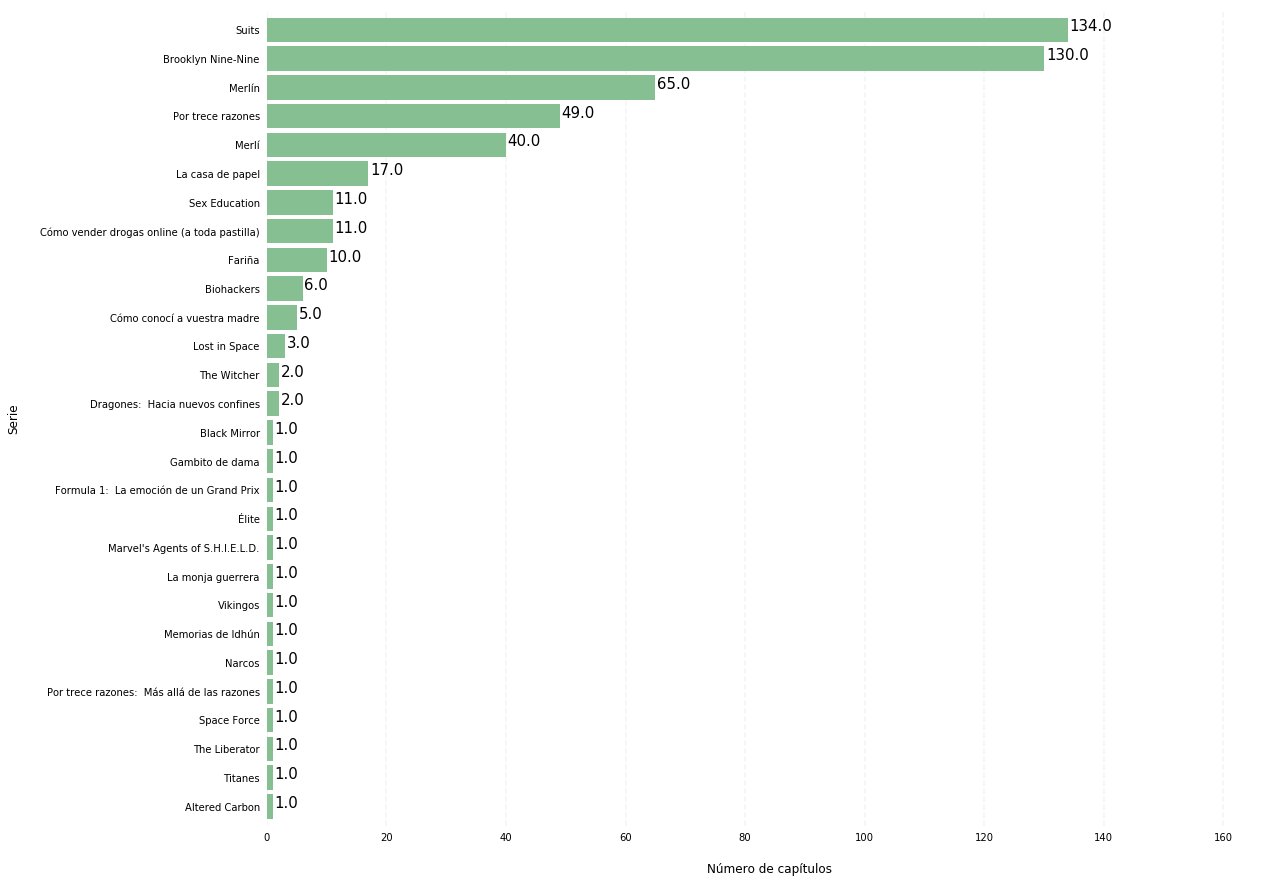

In [15]:
episodios_series = series_df.groupby(['Título']).size().sort_values(ascending=True)

ax = episodios_series.plot(kind='barh', figsize=(18, 15), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.7, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Número de capítulos", labelpad=20, size=12)

# Set y-axis label
ax.set_ylabel("Serie", labelpad=20, size=12)


# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            i.get_width(), fontsize=15,
color='black')
    
plt.show()

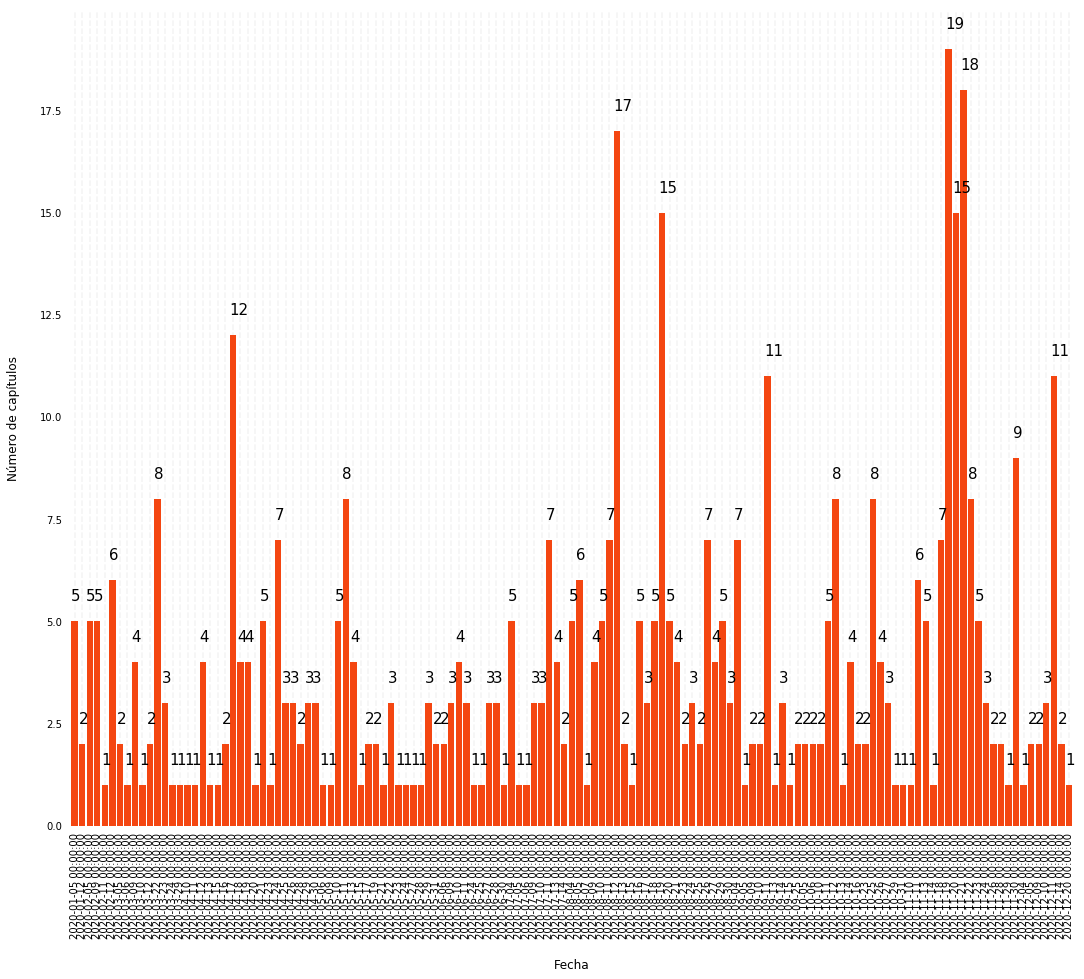

In [16]:
episodios_dia = series_df.groupby(['Date']).size()

ax = episodios_dia.plot(kind='bar', figsize=(18, 15), color='#F44611', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.7, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Fecha", labelpad=20, size=12)

# Set y-axis label
ax.set_ylabel("Número de capítulos", labelpad=20, size=12)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, int(round(i.get_height())), fontsize=15, color='black')
    
plt.show()

In [17]:
episodios_dia

Date
2020-01-05     5
2020-01-12     2
2020-02-05     5
2020-02-09     5
2020-02-11     1
2020-02-12     6
2020-03-05     2
2020-03-06     1
2020-03-09     4
2020-03-10     1
2020-03-12     2
2020-03-22     8
2020-03-23     3
2020-03-24     1
2020-03-29     1
2020-04-10     1
2020-04-11     1
2020-04-12     4
2020-04-13     1
2020-04-15     1
2020-04-16     2
2020-04-17    12
2020-04-18     4
2020-04-19     4
2020-04-20     1
2020-04-21     5
2020-04-23     1
2020-04-24     7
2020-04-25     3
2020-04-26     3
              ..
2020-10-14     4
2020-10-16     2
2020-10-23     2
2020-10-25     8
2020-10-26     4
2020-10-27     3
2020-10-29     1
2020-10-31     1
2020-11-10     1
2020-11-11     6
2020-11-13     5
2020-11-14     1
2020-11-18     7
2020-11-19    19
2020-11-20    15
2020-11-21    18
2020-11-22     8
2020-11-23     5
2020-11-24     3
2020-11-26     2
2020-11-28     2
2020-11-29     1
2020-11-30     9
2020-12-04     1
2020-12-05     2
2020-12-09     2
2020-12-10     3
2020-12-1

In [18]:
DAYS = ['Sun.', 'Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.', 'Sat.']
MONTHS = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']


def date_heatmap(series, start=None, end=None, mean=False, ax=None, **kwargs):
    '''Plot a calendar heatmap given a datetime series.

    Arguments:
        series (pd.Series):
            A series of numeric values with a datetime index. Values occurring
            on the same day are combined by sum.
        start (Any):
            The first day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            earliest date in the data.
        end (Any):
            The last day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            latest date in the data.
        mean (bool):
            Combine values occurring on the same day by mean instead of sum.
        ax (matplotlib.Axes or None):
            The axes on which to draw the heatmap. The default is the current
            axes in the :module:`~matplotlib.pyplot` API.
        **kwargs:
            Forwarded to :meth:`~matplotlib.Axes.pcolormesh` for drawing the
            heatmap.

    Returns:
        matplotlib.collections.Axes:
            The axes on which the heatmap was drawn. This is set as the current
            axes in the `~matplotlib.pyplot` API.
    '''
    # Combine values occurring on the same day.
    dates = series.index.floor('D')
    group = series.groupby(dates)
    series = group.mean() if mean else group.sum()

    # Parse start/end, defaulting to the min/max of the index.
    start = pd.to_datetime(start or series.index.min())
    end = pd.to_datetime(end or series.index.max())

    # We use [start, end) as a half-open interval below.
    end += np.timedelta64(1, 'D')

    # Get the previous/following Sunday to start/end.
    # Pandas and numpy day-of-week conventions are Monday=0 and Sunday=6.
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun = end + np.timedelta64(7 - end.dayofweek - 1, 'D')

    # Create the heatmap and track ticks.
    num_weeks = (end_sun - start_sun).days // 7
    heatmap = np.zeros((7, num_weeks))
    ticks = {}  # week number -> month name
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += '\n{date.year}'
            if start <= date < end:
                heatmap[day, week] = series.get(date, 0)

    # Get the coordinates, offset by 0.5 to align the ticks.
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5

    # Plot the heatmap. Prefer pcolormesh over imshow so that the figure can be
    # vectorized when saved to a compatible format. We must invert the axis for
    # pcolormesh, but not for imshow, so that it reads top-bottom, left-right.
    ax = ax or plt.gca()
    mesh = ax.pcolormesh(x, y, heatmap, **kwargs)
    ax.invert_yaxis()

    # Set the ticks.
    ax.set_xticks(list(ticks.keys()))
    ax.set_xticklabels(list(ticks.values()))
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(DAYS)

    # Set the current image and axes in the pyplot API.
    plt.sca(ax)
    plt.sci(mesh)

    return ax


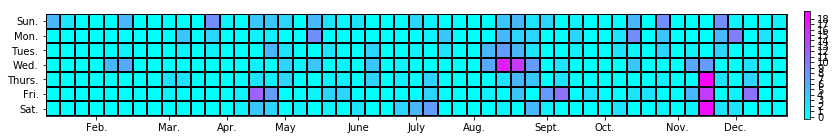

In [19]:
# Create the figure. For the aspect ratio, one year is 7 days by 53 weeks.
# We widen it further to account for the tick labels and color bar.

maximo_visualizaciones_dia = series_df.groupby(['Date']).size().max()

figsize = plt.figaspect(7 / 56)
fig = plt.figure(figsize=figsize)

# Plot the heatmap with a color bar.
ax = date_heatmap(episodios_dia, edgecolor='black')
plt.colorbar(ticks=range(maximo_visualizaciones_dia), pad=0.02)

# Use a discrete color map with 5 colors (the data ranges from 0 to 4).
# Extending the color limits by 0.5 aligns the ticks in the color bar.
cmap = mpl.cm.get_cmap('cool', maximo_visualizaciones_dia)
plt.set_cmap(cmap)
plt.clim(-0.5, maximo_visualizaciones_dia+0.5)

# Force the cells to be square. If this is set, the size of the color bar
# may look weird compared to the size of the heatmap. That can be corrected
# by the aspect ratio of the figure or scale of the color bar.
ax.set_aspect('equal')
plt.show()


### Días de la semana que más capítulos se ven

In [20]:
#series_df['Dia'] = series_df['Date'].apply(lambda x: x.weekday())
series_df['Dia'] = series_df['Date'].apply(lambda x: x.strftime('%A'))
series_df['Mes'] = series_df['Date'].apply(lambda x: x.strftime('%B'))
series_df

,Title,Date,Tipo,Título,Temporada,Capítulo,Dia,Mes
0,Brooklyn Nine-Nine: Temporada 3: Adrian Pimento,2020-12-20,Serie,Brooklyn Nine-Nine,Temporada 3,Adrian Pimento,Sunday,December
1,Brooklyn Nine-Nine: Temporada 3: Casa ratón,2020-12-14,Serie,Brooklyn Nine-Nine,Temporada 3,Casa ratón,Monday,December
2,Brooklyn Nine-Nine: Temporada 3: La 9-8,2020-12-14,Serie,Brooklyn Nine-Nine,Temporada 3,La 9-8,Monday,December
3,Brooklyn Nine-Nine: Temporada 3: Karen Peralta,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Karen Peralta,Monday,October
4,Brooklyn Nine-Nine: Temporada 3: El crucero,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,El crucero,Monday,October
5,Brooklyn Nine-Nine: Temporada 3: Nueve días,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Nueve días,Monday,October
6,Brooklyn Nine-Nine: Temporada 3: Situación con...,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Situación con rehenes,Monday,October
7,Brooklyn Nine-Nine: Temporada 3: Yippie Kayak,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Yippie Kayak,Monday,October
8,Brooklyn Nine-Nine: Temporada 3: Los suecos,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Los suecos,Monday,October
9,Brooklyn Nine-Nine: Temporada 3: Ava,2020-10-12,Serie,Brooklyn Nine-Nine,Temporada 3,Ava,Monday,October


In [21]:
capitulos_por_dia_semana = series_df.groupby(['Dia']).size()
capitulos_por_dia_semana

Dia
Friday       92
Monday       66
Saturday     60
Sunday       84
Thursday     57
Tuesday      48
Wednesday    92
dtype: int64

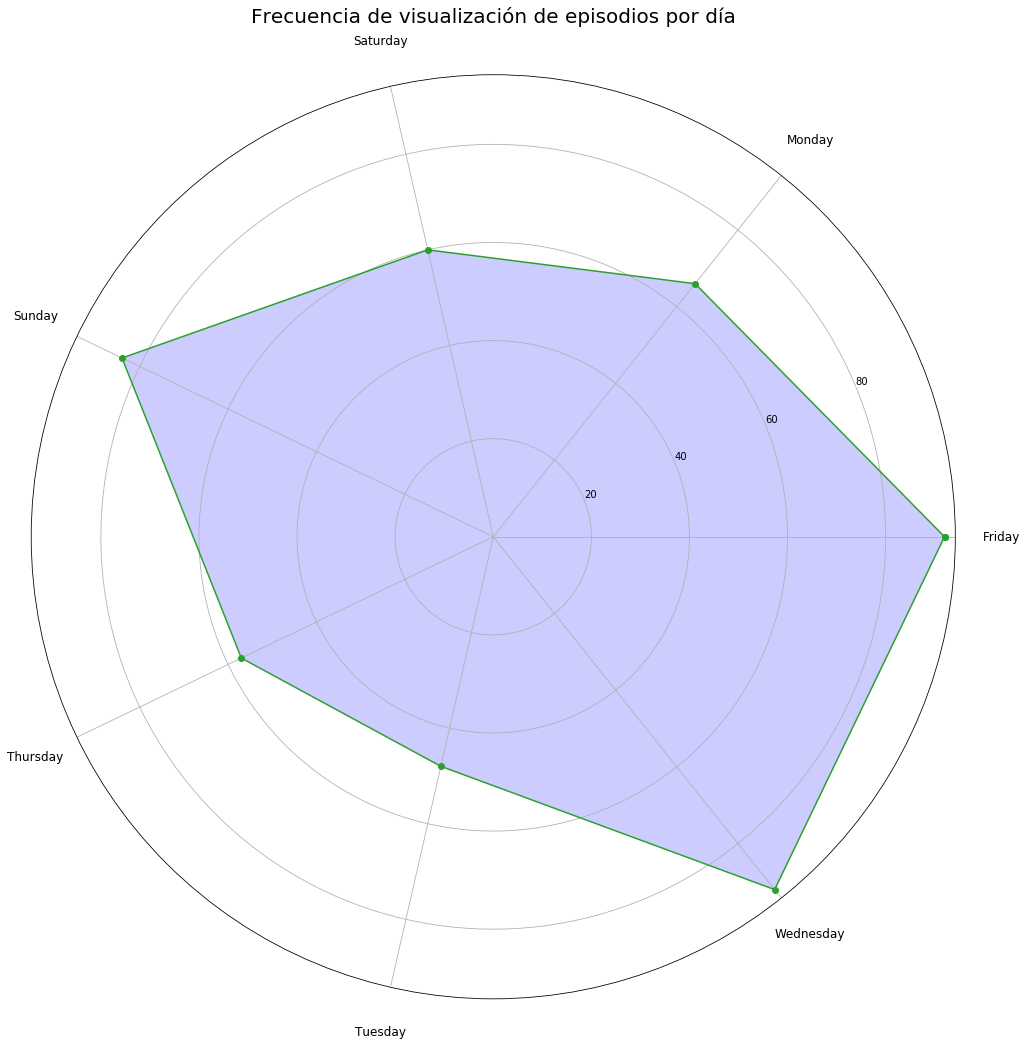

In [22]:
fig = plt.figure(figsize=(17,17))
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(capitulos_por_dia_semana) + 1) / float(len(capitulos_por_dia_semana)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = capitulos_por_dia_semana.values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], capitulos_por_dia_semana.index, color='black', size=12)
ax.tick_params(pad=20) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'blue', alpha=0.2)

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Frecuencia de visualización de episodios por día",fontsize=20, color='black')
plt.show()

In [23]:
capitulos_por_mes = series_df.groupby(['Mes']).size()
capitulos_por_mes

Mes
April         58
August       111
December      22
February      17
January        7
July          26
June          21
March         23
May           37
November     102
October       45
September     30
dtype: int64

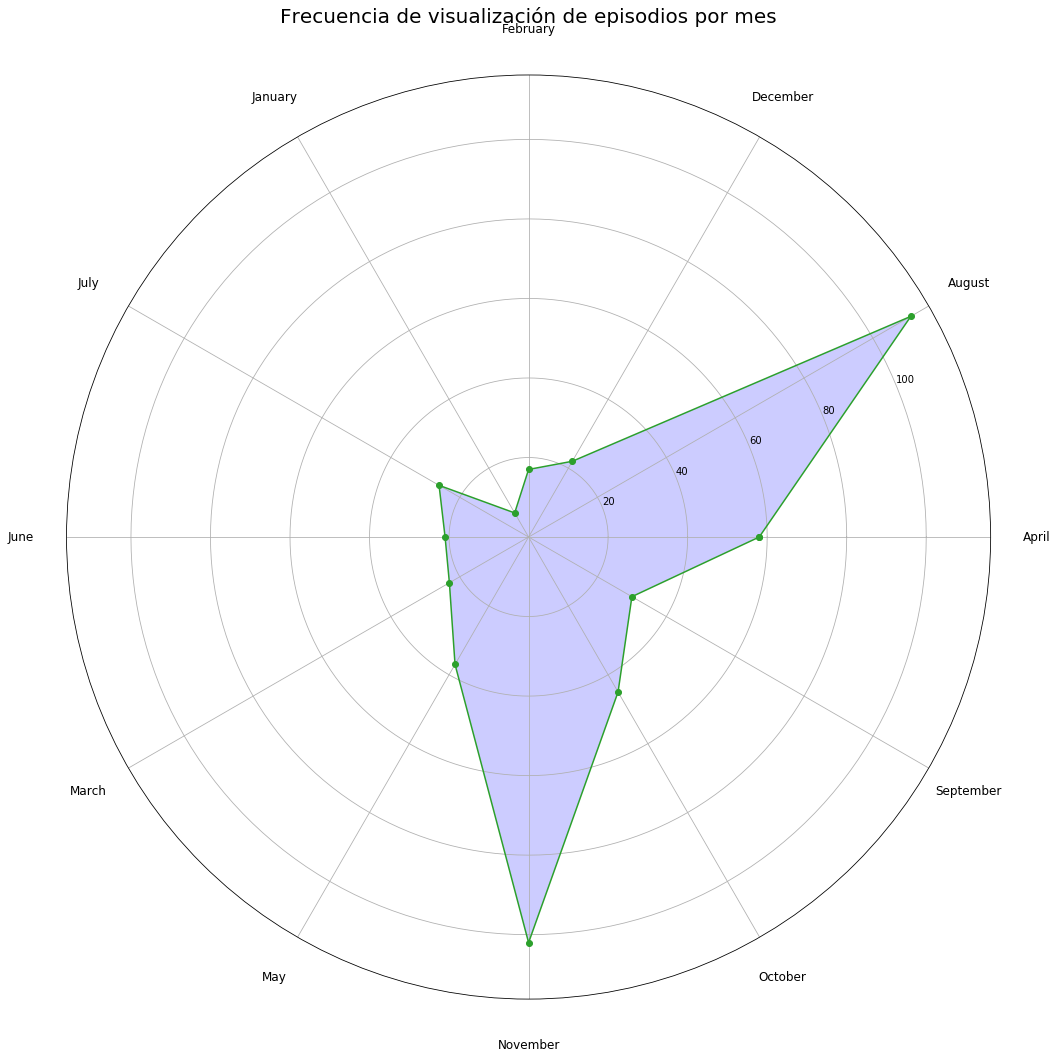

In [24]:
fig = plt.figure(figsize=(17,17))
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(capitulos_por_mes) + 1) / float(len(capitulos_por_mes)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = capitulos_por_mes.values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], capitulos_por_mes.index, color='black', size=12)
ax.tick_params(pad=20) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'blue', alpha=0.2)

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Frecuencia de visualización de episodios por mes",fontsize=20, color='black')
plt.show()

# Análisis de las películas

In [25]:
# Vamos a ver si hemos visto alguna película varias veces

peliculas_repes = pelis_df.groupby(['Título']).size().sort_values(ascending=False)
peliculas_repes

Título
¿En qué piensan los hombres?          1
Fast & Furious 6                      1
El gran hackeo                        1
El hoyo                               1
El juicio de los 7 de Chicago         1
El niño que domó el viento            1
El renacido                           1
El rey proscrito                      1
Emboscada final                       1
Enola Holmes                          1
Fast & Furious 5                      1
Fast & Furious 7                      1
El destino de Júpiter                 1
Fast & Furious 8                      1
Go Karts                              1
Green Book                            1
Historia de un matrimonio             1
IO                                    1
Infiltrados en Miami                  1
Iron Man                              1
Kick-ass. Listo para machacar         1
Kung Fu Panda                         1
El fotógrafo de Mauthausen            1
El canto del lobo                     1
Watchmen                         

In [26]:
pelis_df['Dia'] = pelis_df['Date'].apply(lambda x: x.strftime('%A'))
pelis_df['Mes'] = pelis_df['Date'].apply(lambda x: x.strftime('%B'))
pelis_df

,Title,Date,Tipo,Título,Dia,Mes
0,El Irlandés,2020-12-27,Película,El Irlandés,Sunday,December
1,Dos policías rebeldes,2020-11-12,Película,Dos policías rebeldes,Thursday,November
2,Fast & Furious 8,2020-07-12,Película,Fast & Furious 8,Sunday,July
3,La Nochebuena es mi condena,2020-04-12,Película,La Nochebuena es mi condena,Sunday,April
4,21: Blackjack,2020-04-12,Película,21: Blackjack,Sunday,April
5,Crónicas de Navidad,2020-11-27,Película,Crónicas de Navidad,Friday,November
6,Atrápame si puedes,2020-11-27,Película,Atrápame si puedes,Friday,November
7,Historia de un matrimonio,2020-11-16,Película,Historia de un matrimonio,Monday,November
8,Amor de calendario,2020-11-15,Película,Amor de calendario,Sunday,November
9,El hoyo,2020-11-14,Película,El hoyo,Saturday,November


In [27]:
pelis_por_dia_semana = pelis_df.groupby(['Dia']).size()
pelis_por_dia_semana

Dia
Friday       18
Monday       14
Saturday     18
Sunday        9
Thursday     13
Tuesday      10
Wednesday    12
dtype: int64

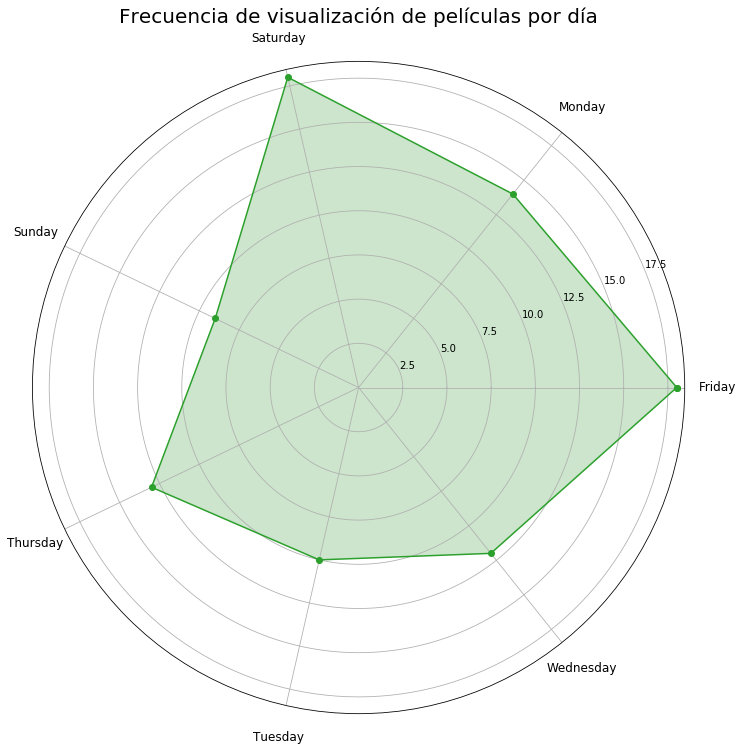

In [28]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(pelis_por_dia_semana) + 1) / float(len(pelis_por_dia_semana)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = pelis_por_dia_semana.values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], pelis_por_dia_semana.index, color='black', size=12)
ax.tick_params(pad=20) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.2)

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Frecuencia de visualización de películas por día",fontsize=20, color='black')
plt.show()

In [29]:
pelis_por_mes = pelis_df.groupby(['Mes']).size()
pelis_por_mes

Mes
April        15
August       11
December      8
February      6
January       3
July          6
June          4
March         5
May           3
November     11
October      15
September     7
dtype: int64

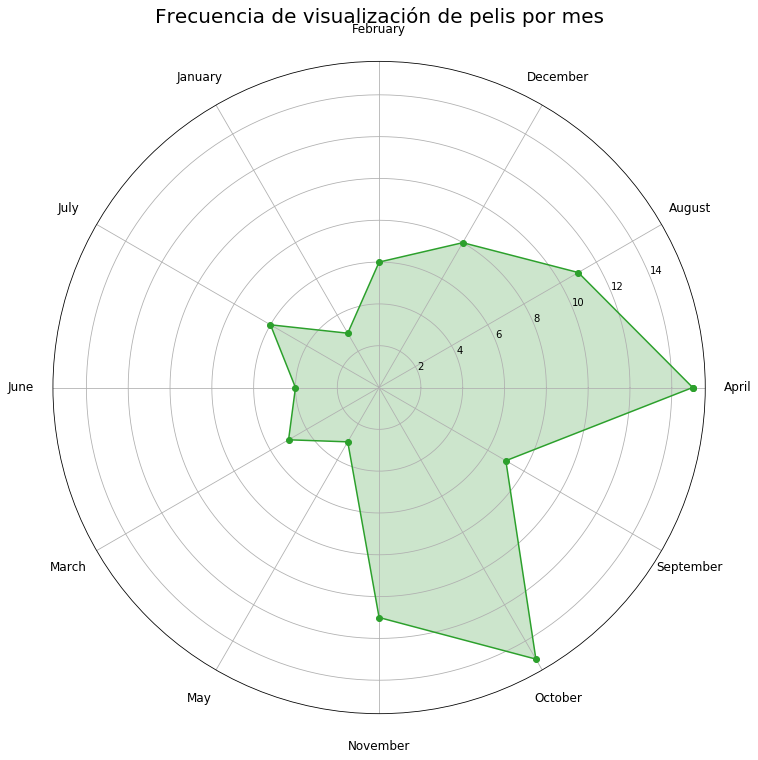

In [30]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(pelis_por_mes) + 1) / float(len(pelis_por_mes)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = pelis_por_mes.values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], pelis_por_mes.index, color='black', size=12)
ax.tick_params(pad=20) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.2)

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Frecuencia de visualización de pelis por mes",fontsize=20, color='black')
plt.show()

# Comparación de películas y series

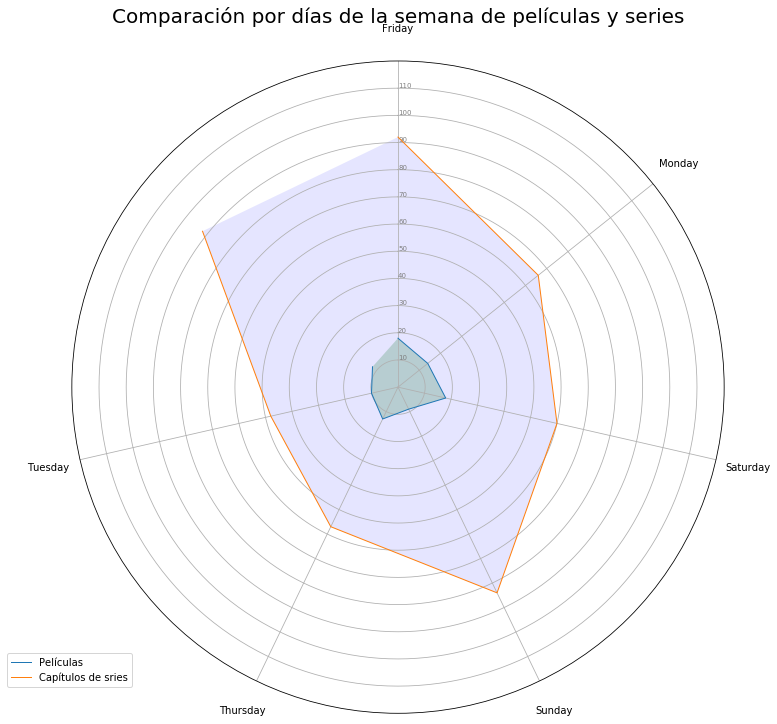

In [31]:
#Por días de semana
fig = plt.figure(figsize=(12,12))
# number of variable
categories=pelis_por_dia_semana.index
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles.pop(-1)
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60,70,80,90,100,110], ["10","20","30","40","50","60","70","80","90","100","110"], color="grey", size=7)
plt.ylim(0,120)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values_pelis=pelis_por_dia_semana.values
ax.plot(angles, values_pelis, linewidth=1, linestyle='solid', label="Películas")
ax.fill(angles, values_pelis, 'g', alpha=0.2)
 
# Ind2
values_series=capitulos_por_dia_semana.values
ax.plot(angles, values_series, linewidth=1, linestyle='solid', label="Capítulos de sries")
ax.fill(angles, values_series, 'b', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Comparación por días de la semana de películas y series",fontsize=20, color='black')

plt.show()

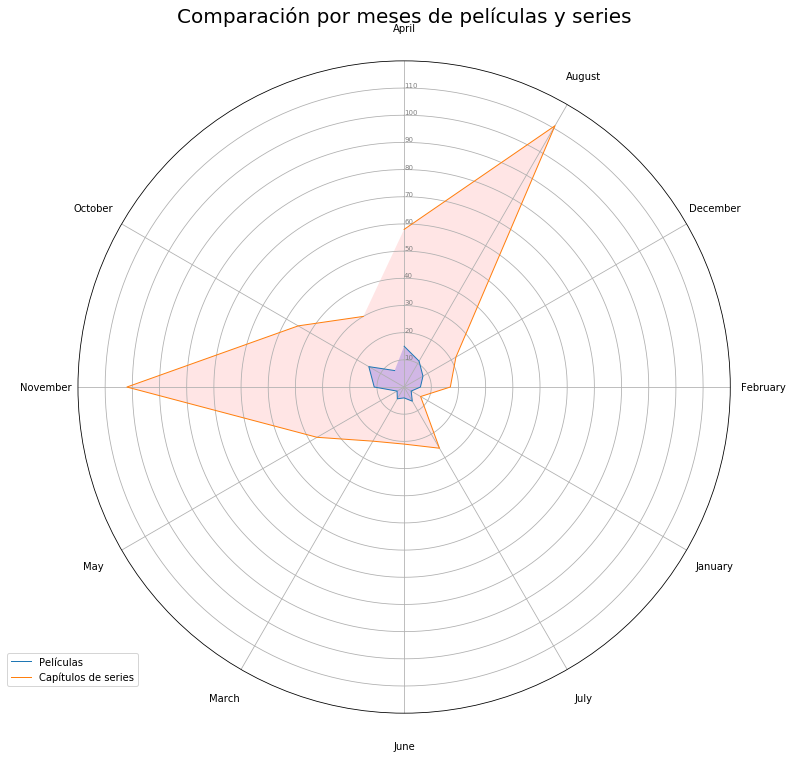

In [32]:
# Por meses
#En las pelis hay que añadir mayo, que está vacío:
#mayo = pd.Series([0], index=['May'])
#pelis_por_mes = pelis_por_mes.append(mayo)

fig = plt.figure(figsize=(12,12))
# number of variable
categories=capitulos_por_mes.index
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles.pop(-1)
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60,70,80,90,100,110], ["10","20","30","40","50","60","70","80","90","100","110"], color="grey", size=7)
plt.ylim(0,120)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values_pelis_mes=pelis_por_mes.values
ax.plot(angles, values_pelis_mes, linewidth=1, linestyle='solid', label="Películas")
ax.fill(angles, values_pelis_mes, 'b', alpha=0.2)
 
# Ind2
values_series_mes=capitulos_por_mes.values
ax.plot(angles, values_series_mes, linewidth=1, linestyle='solid', label="Capítulos de series")
ax.fill(angles, values_series_mes, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Comparación por meses de películas y series",fontsize=20, color='black')

plt.show()